# ARIMA Model with Python

# Dataset
**Minimum Daily Temperatures Dataset**

Use the following dataset that describes the minimum daily temperatures over 10 years (1981-1990) in the city of Melbourne, Australia. The source of the data is credited as the Australian Bureau of Meteorology.
The units are in degrees Celsius and there are 3,650 observations.

Download the dataset here:  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

**Load the dataset and create a line plot of the time series**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [40]:
# Charger le dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
print(data.head())

print(f"\n La taille de la base de données est de {len(data)} \n")

# Vide
data.isnull().sum()

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

 La taille de la base de données est de 3650 



Temp    0
dtype: int64

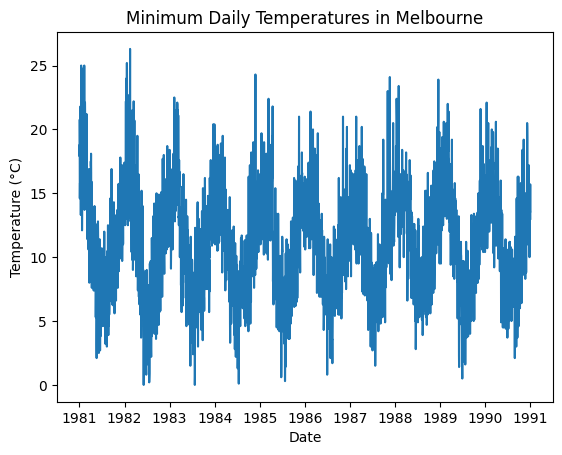

In [41]:
# Créer un graphique en ligne
plt.plot(data)
plt.title('Minimum Daily Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# Split the dataset

Split the dataset into 2 subsets. The first part will be the training dataset that you will use to build an ARIMA model. The second part is the test dataset. It is these time steps that you will treat as out-of-sample.

Write the code to load the dataset, split it into the training and validation datasets, and save them to files *dataset.csv* and *validation.csv* respectively.


**Instructions**

The dataset contains data from January 1st 1981 to December 31st 1990.
Hold back the last 7 days of the dataset from December 1990 as the test dataset and treat those time steps as out of sample.

Specifically 1990-12-25 to 1990-12-31

In [42]:
# Diviser le dataset en train et test sets 80/20
train_size = int(len(data) * 0.7)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)]

# Sauvegarder les fichiers
train.to_csv('data/dataset.csv')
test.to_csv('data/validation.csv')
len(train), len(test)

(2555, 1095)

# Build the model
Check if the data is stationary. If it is not, make it stationary and develop a simple ARIMA model.

In [43]:
# Construire le modèle ARIMA
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
print(model_fit.aic)
print(model_fit.bic)
print(model_fit.hqic)
print(model_fit.params)

/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 2555
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6003.654
Date:                Mon, 10 Mar 2025   AIC                          12019.308
Time:                        12:42:09   BIC                          12054.380
Sample:                             0   HQIC                         12032.027
                               - 2555                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3349      0.018    -18.668      0.000      -0.370      -0.300
ar.L2         -0.3925      0.020    -20.106      0.000      -0.431      -0.354
ar.L3         -0.2952      0.021    -14.298      0.0

# One-step out-of-sample forecast
A one-step forecast is a forecast of the very next time step in the sequence from the available data used to fit the model.

In this case, we are interested in a one-step forecast of Christmas Day 1990: 1990-12-25

**Instructions**
The statsmodel `ARIMAResults` object provides a `forecast()` function for making predictions.

By default, this function makes a single step out-of-sample forecast. As such, you can call it directly and make your forecast. The result of the `forecast()` function is an array containing the forecast value, the standard error of the forecast, and the confidence interval information. You are only interested in the first element of this forecast.

**Expected result: **
`Forecast: 14.861669`

In [44]:
# Prévision hors échantillon d'un pas
forecast = model_fit.forecast(steps=1)
print('Forecast:', forecast)

forecast_value = forecast.iloc[0]
print('Forecast value:', forecast_value)

Forecast: 2555    15.851521
dtype: float64
Forecast value: 15.85152051481058


/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
